# Classification: Multi-layer Perceptron Classifier

In [1]:
#IMPORT DATA
import pandas as pd
data = pd.read_csv('diabetes.csv')

In [2]:
data.head()

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


target
0    500
1    268
dtype: int64


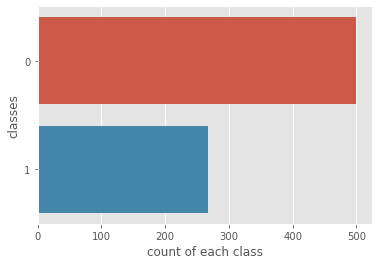

In [3]:
#Print class freq. through pandas 
print(data.groupby('target').size())

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=data.target ,data=data)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [4]:
#gives information about the data types,columns, null value counts, memory usage etc
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timespreg  768 non-null    int64  
 1   gluctol    768 non-null    int64  
 2   diaspb     768 non-null    int64  
 3   triceps    768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   massindex  768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#basic statistic details about the data
data.describe(include="all")

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Separate X and y (explanatory variables and target variable)
X = data.iloc[:,0:-1]
column_names = list(X) 
y = data.iloc[:,-1] 

#X.head()
#y.head()

In [7]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape)

(537, 8)


## Multi-layer Perceptron classifier
![MLPC](mlp.png)


In [8]:
'''Multi-layer Perceptron classifier'''
from sklearn.neural_network import MLPClassifier

model=MLPClassifier(hidden_layer_sizes=(5,3,2),
              activation='relu', alpha=0.001, batch_size='auto',              
              learning_rate='constant',
              max_iter=200, solver='lbfgs', tol=0.01,
              verbose=True)

# hidden_layer_sizes :  The ith element represents the number of neurons in the ith hidden layer, default (100,) . 
# activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’
    #Activation function for the hidden layer.
    #        ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
    #        ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
    #        ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
    #        ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
# solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
    #      ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
    #        ‘sgd’ refers to stochastic gradient descent.
    #        ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
# alpha : float, optional, default 0.0001
    #L2 penalty (regularization term) parameter.
# batch_size :Size of minibatches for stochastic optimizers. When set to “auto”, batch_size=min(200, n_samples)
# learning_rate : {‘constant’, ‘invscaling’, ‘adaptive’}, default ‘constant’
    #    ‘constant’ is a constant learning rate given by ‘learning_rate_init’.
    #    ‘invscaling’ gradually decreases the learning rate at each time step ‘t’ using an inverse scaling exponent of ‘power_t’. effective_learning_rate = learning_rate_init / pow(t, power_t)
    #    ‘adaptive’ keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.
# learning_rate_init : double, optional, default 0.001
# max_iter : Maximum number of iterations.
# tol :Tolerance for the optimization.
# verbose : 

# NOTE: Natively supports multi-class. Which of the other classification algorothms seen so far does too?

model.fit(X_train, y_train)
model.predict(X_test)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           74     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.45961D+00    |proj g|=  1.23419D+01

At iterate    1    f=  6.98075D-01    |proj g|=  1.80249D-01

At iterate    2    f=  6.94587D-01    |proj g|=  1.30799D-01

At iterate    3    f=  6.78409D-01    |proj g|=  1.07076D-01

At iterate    4    f=  6.52807D-01    |proj g|=  7.66394D-02

At iterate    5    f=  6.43549D-01    |proj g|=  2.92817D-02

At iterate    6    f=  6.43469D-01    |proj g|=  1.72122D-02

At iterate    7    f=  6.43449D-01    |proj g|=  1.31938D-02

At iterate    8    f=  6.43439D-01    |proj g|=  5.58237D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [9]:
'''Multi-layer Perceptron classifier'''
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(5,3,2),(5,3)],  "max_iter": [500000], "alpha": [0.1,10]}
#hidden_layer_sizes : The ith element represents the number of neurons in the ith hidden layer.

In [10]:
#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=50, n_jobs=-1, refit=True)

In [11]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


In [12]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.573145 using {'alpha': 10, 'hidden_layer_sizes': (5, 3, 2), 'max_iter': 500000}
0.039216 (0.055459) with: {'alpha': 0.1, 'hidden_layer_sizes': (5, 3, 2), 'max_iter': 500000}
0.194067 (0.232300) with: {'alpha': 0.1, 'hidden_layer_sizes': (5, 3), 'max_iter': 500000}
0.573145 (0.089604) with: {'alpha': 10, 'hidden_layer_sizes': (5, 3, 2), 'max_iter': 500000}
0.471667 (0.174380) with: {'alpha': 10, 'hidden_layer_sizes': (5, 3), 'max_iter': 500000}


In [13]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train)

In [14]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.6319018404907976
--
***RESULTS ON TEST SET***
f1_score:  0.5522388059701492


In [15]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82       150
           1       0.70      0.46      0.55        81

    accuracy                           0.74       231
   macro avg       0.73      0.68      0.68       231
weighted avg       0.73      0.74      0.72       231



In [16]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[134  16]
 [ 44  37]]


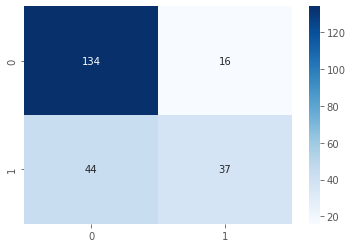

[CV 2/3; 1/4] START alpha=0.1, hidden_layer_sizes=(5, 3, 2), max_iter=500000....
[CV 2/3; 1/4] END alpha=0.1, hidden_layer_sizes=(5, 3, 2), max_iter=500000;, score=0.000 total time=   0.8s
[CV 3/3; 1/4] START alpha=0.1, hidden_layer_sizes=(5, 3, 2), max_iter=500000....
[CV 3/3; 1/4] END alpha=0.1, hidden_layer_sizes=(5, 3, 2), max_iter=500000;, score=0.118 total time=   1.5s
[CV 3/3; 2/4] START alpha=0.1, hidden_layer_sizes=(5, 3), max_iter=500000.......
[CV 3/3; 2/4] END alpha=0.1, hidden_layer_sizes=(5, 3), max_iter=500000;, score=0.062 total time=   0.5s
[CV 2/3; 4/4] START alpha=10, hidden_layer_sizes=(5, 3), max_iter=500000........
[CV 2/3; 4/4] END alpha=10, hidden_layer_sizes=(5, 3), max_iter=500000;, score=0.240 total time=   1.5s
[CV 2/3; 3/4] START alpha=10, hidden_layer_sizes=(5, 3, 2), max_iter=500000.....
[CV 2/3; 3/4] END alpha=10, hidden_layer_sizes=(5, 3, 2), max_iter=500000;, score=0.631 total time=   2.0s
[CV 1/3; 3/4] START alpha=10, hidden_layer_sizes=(5, 3, 2), max

In [17]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format


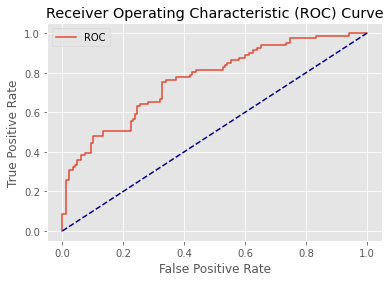

AUC: 0.77


In [37]:
from sklearn import metrics

model=MLPClassifier(hidden_layer_sizes=(5,3), alpha=10, max_iter=50000 )
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)